In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#修改地址
src_fdr = '/home/ljy/repos/patchV1/src/'
debug_fdr = '/home/ljy/repos/patchV1/src/debug/'
res_fdr = '/home/ljy/data/resource_debug/'

1. 修改环境变量
2. 对retino、genCon、patch_fast进行编译
3. 生成ext_input和resource文件
4. 运行retino、genCon生成LGN与V1、V1与V1的连接
5. 运行minimalTC，即运行6个方向的patch_fast
6. 读取数据文件，生成pref_ori的分布

# 修改环境变量
1. 参考src_fdr下的environment_variable.txt，要根据自己的服务器修改CPLUS_INCLUDE_PATH、LD_LIBRARY_PATH、LIBRARY_PATH、CUDA_LIB等
2. 在~/.bashrc中修改环境变量
3. source ~/.bashrc 或者重启，更新环境变量

# 进行编译
其中sm需要根据不同的gpu修改

In [2]:
#修改CUDA_LIB，和环境变量保持一致
os.system(f'cd {src_fdr}/ && ./compile-nonhpc')

./compile-nonhpc: line 10: /home/ljy/miniconda3/envs/neuro/lib/: Is a directory
patch.cu(4407): warning: variable "get_excRangeBound" was declared but never referenced

patch.cu(1342): warning: variable "simpleContrast" was declared but never referenced

ptxas info    : 221856 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z17cudaMemsetNonzeroIfEvPT_jS0_' for 'sm_75'
ptxas info    : Function properties for _Z17cudaMemsetNonzeroIfEvPT_jS0_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 368 bytes cmem[0]
ptxas info    : 223417 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3aS_S_S_f16ConductanceShapeS3_jjjjjjijjjjj14LearnVarShapeE14LearnVarShapeQjjb' for 'sm_75'
ptxas info    : Function properties for _Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3

0

In [3]:
os.system(f'cd {src_fdr}/ && ./gompile-nonhpc')

ptxas info    : 221728 bytes gmem, 88 bytes cmem[3]
ptxas info    : Function properties for _Z4passfff
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Function properties for _Z6OPpreffff
    24 bytes stack frame, 24 bytes spill stores, 24 bytes spill loads
ptxas info    : Function properties for _Z6ODpreffff
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : 220044 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z17generate_symmetryPjS_PiPfS_S1_S_P19curandStateMRG32k3aS_S1_jjjjjjjjjj' for 'sm_75'
ptxas info    : Function properties for _Z17generate_symmetryPjS_PiPfS_S1_S_P19curandStateMRG32k3aS_S1_jjjjjjjjjj
    32 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 64 registers, 472 bytes cmem[0], 8 bytes cmem[2]
ptxas info    : Compiling entry function '_Z20generate_connectionsPdPfS0_S0_S0_PjS1_S1_S1_S1_S0_S0_S0_S0_S0_S0_S0_S0_S0_S1_S1_S0_S0_S1_S1_S1_S1_S1_S1_S0_S

0

In [4]:
os.system(f'cd {src_fdr}/ && ./rompile-nonhpc')

retinotopic_connections.cu(903): warning: missing return statement at end of non-void function "lambda []()->RFtype"

retinotopic_connections.cu(939): warning: missing return statement at end of non-void function "lambda [](RFtype)->OutputType"

retinotopic_connections.cu(1088): warning: variable "ic_max" was set but never used

retinotopic_connections.cu(1089): warning: variable "is_max" was set but never used

ptxas info    : 223062 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z12vf_pool_CUDAPfS_S_S_S_S_S_S_PjS0_jjjjmfj' for 'sm_75'
ptxas info    : Function properties for _Z12vf_pool_CUDAPfS_S_S_S_S_S_S_PjS0_jjjjmfj
    128 bytes stack frame, 100 bytes spill stores, 272 bytes spill loads
ptxas info    : Used 64 registers, 464 bytes cmem[0], 56 bytes cmem[2]
retinotopic_connections.cu(903): warning: missing return statement at end of non-void function "lambda []()->RFtype"

retinotopic_connections.cu(939): warning: missing return statement at end of non-void

0

# 生成图像和resource文件

In [5]:
#注意修改地址，三个地址应该一致
#创建文件夹
os.system(f'mkdir {res_fdr}')
#运行ext_input_debug.py 生成图像
os.system(f'cd {debug_fdr}/ && python ext_input_debug.py {res_fdr}')
#运行pinwheel_disk_debug.py 生成resource文件
os.system(f'cd {debug_fdr} && python pinwheel_disk_debug.py {res_fdr}')


mkdir: cannot create directory ‘/home/ljy/data/resource_debug/’: File exists


lum in LMS = [0.45436904 0.47353315 0.0720978 ]
[[1.31265115 0.37916654 0.17658182]
 [0.37916654 0.43588297 0.06613005]
 [0.17658182 0.06613005 1.03101131]]
[[10.82668925 -2.48855249  0.0461736 ]
 [-2.48855249  1.38614356 -0.12768065]
 [ 0.0461736  -0.12768065  1.15767798]]
/home/ljy/data/resource_debug/
32 degree per pixel
crest in sRGB: [1.33812324 0.27949648 0.72012624]
valley in sRGB: [-9.61030551  0.94753945  0.68825061]
0.005343945578232466 degree per pixel
ecc = 0.0344, buffer_ecc = 0.05110312925171946
12
exact 12 frames in total
sharpness=1.0
it: 0
sRGB space is not enough to represent the color
(array([-9.48965661,  0.28566867,  0.68836448]), array([1.3353379 , 0.94619346, 0.72001885]))
it: 1
sRGB space is not enough to represent the color
(array([-8.96769788,  0.27952112,  0.68885683]), array([1.33811228, 0.94034096, 0.72012582]))
it: 2
sRGB space is not enough to represent the color
(array([-9.51800945,  0.2872862 ,  0.68833772]), array([1.33459482, 0.94651   , 0.71999025]))

0

# 运行retino和genCon

In [6]:
#test_lgn_debug.cfg 中的resourceFolder需要修改，和之前一致
os.system(f'cd {res_fdr} && retino -c {debug_fdr}test_lgn_debug.cfg')
#test_v1_debug.cfg 中的resourceFolder和inputFolder需要修改，和之前一致
os.system(f'cd {res_fdr} && genCon -c {debug_fdr}test_v1_debug.cfg')



Using configuration file: /home/ljy/repos/patchV1/src/debug/test_lgn_debug.cfg
CUDA device [NVIDIA GeForce RTX 2080 Ti] has 68 Multi-Processors SM 7.5
total global memory: 11019.562500 Mb.
maximum threads per MP: 1024.
shared memory per block: 49152 bytes.
registers per block: 65536.

5 x 1024 = 5120 post-synaptic neurons
V1_x: [-0.0101153, 0.0101167]
V1_y: [-0.0101155, 0.0101169]
512 LGN neurons, 512 from left eye, 0 from right eye.
need 0mb
LGN_x: [-0.0338376, 0.0335363]
LGN_y: [-0.0339028, 0.032685]
carts ready
left eye: 5120 V1 neurons
right eye: 0 V1 neurons
max pool of LGN = 1024
poolList need memory of 5120x1024x4 = 20971520 = 20mb
need global memory of 20.1406mb in total
vf_pool_CUDA<<<5, 1024>>> (Ipsi)
vf_pool_CUDA<<<0, 1024>>> (Contra)
LGN_V1_RFratio = 0.5
ecc = [0.000127278, 0.00683016, 0.0101169] deg
a = [0.0191669, 0.0508145, 0.0941305] deg
baRatio = [1.2, 1.2, 1.2] deg
R = [0.0372149, 0.0986628, 0.182766] deg
right poolSizes: [1024, 0, 0 < 1024]
among them 0 would have no

0

# 运行minimalTC

In [7]:
##########################################################################################
# 修改minimalTC_debug中8-13行的地址
# cfg_fdr 表示 test_lgn_xxx.cfg、test_v1_xxx.cfg、minimal_xxx.cfg存放地址
# fdr0 是存放数据文件的地址
# res_fdr 是存放ext_input和pinwheel生成的文件的地址, 一般为fdr0/resource_xxx
# setup_fdr 是存放retino和genCon生成的文件的地址, 一般为fdr0/setup_xxx
# data_fdr 是存放patch_fast生成的文件的地址, 一般为fdr0/data_xxx
# 在debug和tmp测试中，我把res_fdr、setup_fdr、data_fdr统一为同一个文件夹
# ★可以在 fig_fdr/log 看log文件，观察是哪里报错了 (fig_dir在minimalTC_debug中查找)
############################################################################################
os.system(f'cd {debug_fdr} && ./minimalTC_debug')

debug
overwrite contents in /home/ljy/data/resource_debug
overwrite contents in /home/ljy/data/debug
configuration files copied
plotting files copied
7[>4;2m="~/data/debug/debug-ori_2.cfg" [dos] 248L, 5556Cprint = false
flat_retina = true
uniform_LGN = true
LGN_switch = false
reverseInput = false
useNewLGN = true

seed = 65098148
#  e/s (evoked/spont), g/c (grey-scale/color), %d-%d(SF - TF)%d(orientation), idd of V1con and LGNcon
#output_suffix = spont1
output_suffix = debug_1
#conV1_suffix = dense0
conV1_suffix = test_v1
#conV1_suffix = IE
conLGN_suffix = test_lgn 
fStimulus = drifting_color_1.bin
iOri = 1
nOri = 6
#fStimulus = grey.bin
frameRate = 96
#fSnapshot =  snapShot_1599490246
ix = e8_g8-8d_db_equi217,8Top11g   1,12316g   6,1 322817g   7,1 68<a/debug/debug-ori_2.cfg" [dos] 248L, 5556C written
>[>4;m87[>4;2m="~/data/debug/debug-ori_3.cfg" [dos] 248L, 5556Cprint = false
flat_retina = true
uniform_LGN = true
LGN_switch = false
reverseInput = false
useNewLGN = true

seed 

Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal
Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal


   7,1 68<a/debug/debug-ori_3.cfg" [dos] 248L, 5556C written
>[>4;m82
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 1 sample_OutAndInputCount_
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 2 sample_OutAndInputCount_
7[>4;2m="~/data/debug/debug-ori_4.cfg" [dos] 248L, 5556Cprint = false
flat_retina = true
uniform_LGN = true
LGN_switch = false
reverseInput = false
useNewLGN = true

seed = 65098148
#  e/s (evoked/spont), g/c (grey-scale/color), %d-%d(SF - TF)%d(orientation), idd of V1con and LGNcon
#output_suffix = spont1
output_suffix = debug_3
#conV1_suffix = dense0
conV1_suffix = test_v1
#conV1_suffix = IE
conLGN_suffix = test_lgn 
fStimulus = drifting_color_3.bin
iOri = 3
nOri = 6
#fStimulus = grey.

Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal
Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal


4
debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
8.0
1
sample_OutAndInputCount_
debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
8.0
2
sample_OutAndInputCount_
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 3 sample_OutAndInputCount_
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 4 sample_OutAndInputCount_
7[>4;2m="~/data/debug/debug-ori_6.cfg" [dos] 248L, 5556Cprint = false
flat_retina = true
uniform_LGN = true
LGN_switch = false
reverseInput = false
useNewLGN = true

seed = 65098148
#  e/s (evoked/spont), g/c (grey-scale/color), %d

Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal


debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
8.0
4
sample_OutAndInputCount_
debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
8.0
3
sample_OutAndInputCount_
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 5 sample_OutAndInputCount_
python /home/ljy/data/debug/generate_input_debug.py debug_1 debug minimal-patch test_lgn test_v1 /home/ljy/data/resource_debug /home/ljy/data/resource_debug /home/ljy/data/resource_debug 8 6 sample_OutAndInputCount_
debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
/home/ljy/data/resource_debug
8.0
6
sample_OutAndInputCount_
debug_1
debug
minimal-patch
test_lgn
test_v1
/home/ljy/data/resource_d

0

# 观察神经元的max_fr和pref_ori的分布

In [8]:
setup_fdr = res_fdr
data_fdr = res_fdr
output_suffix = 'debug'
n_pic = 6

cfg = []
fr = []
F0_input = []
F1_input = []
for k in range(1,n_pic+1):
    #读取参数文件
    with open(res_fdr+f'drifting_color_{k}_cfg.bin') as f:
        sf = np.fromfile(f,'f4',1)[0]
        ori = np.fromfile(f,'f4',1)[0]
        phase = np.fromfile(f,'f4',1)[0]
        c = np.fromfile(f,'f4',1)[0]
    cfg.append([sf,ori,phase,c])

    #读取文件
    with open(data_fdr+'sample_OutAndInputCount_'+output_suffix+'_'+str(k)+'.bin') as f:
        sampleSize = np.fromfile(f,'u4',1)[0]
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)
        sampleID = np.fromfile(f,'u4',sampleSize)
        sample_spikeCount = np.fromfile(f,'u4',sampleSize)
        F0 = np.fromfile(f,'f4',sampleSize)
        F1 = np.fromfile(f,'f4',sampleSize)    
    fr.append(sample_spikeCount)
    F0_input.append(F0)
    F1_input.append(F1)
fr = np.array(fr)/(sample_t1-sample_t0)*1000
F0_input = np.array(F0_input)
F1_input = np.array(F1_input)
cfg = np.array(cfg)

nOri = 6
max_idx = np.argmax(fr,axis=0)
max_fr = np.max(fr,axis=0)
max_sf = cfg[:,0][max_idx]
max_ori = cfg[:,1][max_idx]
pref_sf = max_sf
pref_ori = max_ori


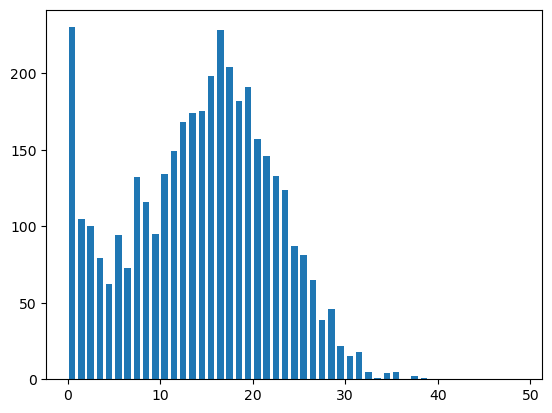

In [9]:
plt.hist(max_fr,bins=np.arange(0,50,1),rwidth=0.7)
plt.show()
plt.close()

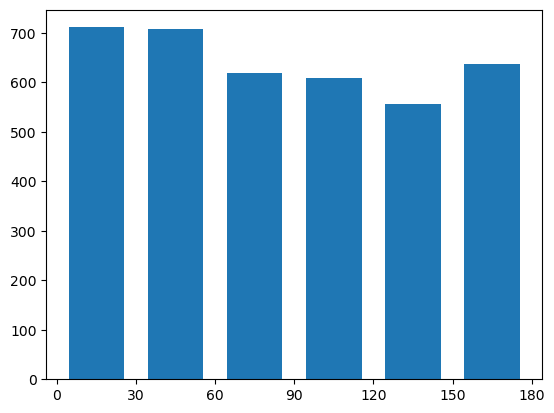

In [10]:
ori_range = np.arange(0,195,30)
plt.hist(max_ori,bins=ori_range,rwidth=0.7)
plt.xticks(ori_range)
plt.show()
plt.close()

### 如果生成如以上两张图，说明程序可正常运行且参数可接受